# Andres -  EDA

### Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

# Visualization settings
sns.set(style="darkgrid")
plt.rcParams['figure.figsize'] = (10, 6)

---
### Data Loading

In [2]:
# Load training data
X_train = pd.read_csv('cleaned_x_train.csv')
y_train = pd.read_csv('cleaned_y_train.csv')

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)

X_train shape: (24158, 25)
y_train shape: (24158, 1)


In [3]:
# Check column names
print("Features:")
print(X_train.columns.tolist())

Features:
['ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC', 'ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM', 'ACEADSAF', 'ACEADNED', '_EDUCAG', '_AGE80', '_SEX', 'MENTHLTH', 'PHYSHLTH', '_SMOKER3', 'race_2.0', 'race_3.0', 'race_4.0', 'race_5.0', 'race_6.0', 'at_least_1_ace', 'ACE_SCORE']


In [4]:
print("Class distribution:")
print(y_train['risky_drinking'].value_counts())
print(f"Risky drinking: {y_train['risky_drinking'].mean():.1%}")
print(f"Not risky: {(1 - y_train['risky_drinking'].mean()):.1%}")

Class distribution:
risky_drinking
False    15048
True      9110
Name: count, dtype: int64
Risky drinking: 37.7%
Not risky: 62.3%


---
### Distribution Analysis

#### Class Distribution

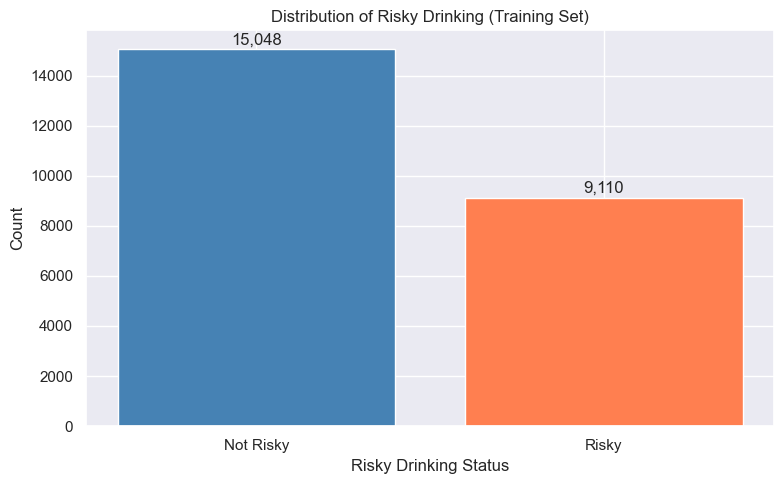

In [5]:
plt.figure(figsize=(8, 5))
counts = y_train['risky_drinking'].value_counts().sort_index()
plt.bar(['Not Risky', 'Risky'], counts.values, color=['steelblue', 'coral'])
plt.title('Distribution of Risky Drinking (Training Set)')
plt.ylabel('Count')
plt.xlabel('Risky Drinking Status')
for i, v in enumerate(counts.values):
    plt.text(i, v + 200, f'{v:,}', ha='center')
plt.tight_layout()
plt.show()

#### ACE Variables Distribution

In [6]:
# ACE variable
binary_ace = ['ACEDEPRS', 'ACEDRINK', 'ACEDRUGS', 'ACEPRISN', 'ACEDIVRC']
ordinal_ace = ['ACEPUNCH', 'ACEHURT1', 'ACESWEAR', 'ACETOUCH', 'ACETTHEM']
protective_ace = ['ACEADSAF', 'ACEADNED']
ace_cols = binary_ace + ordinal_ace + protective_ace

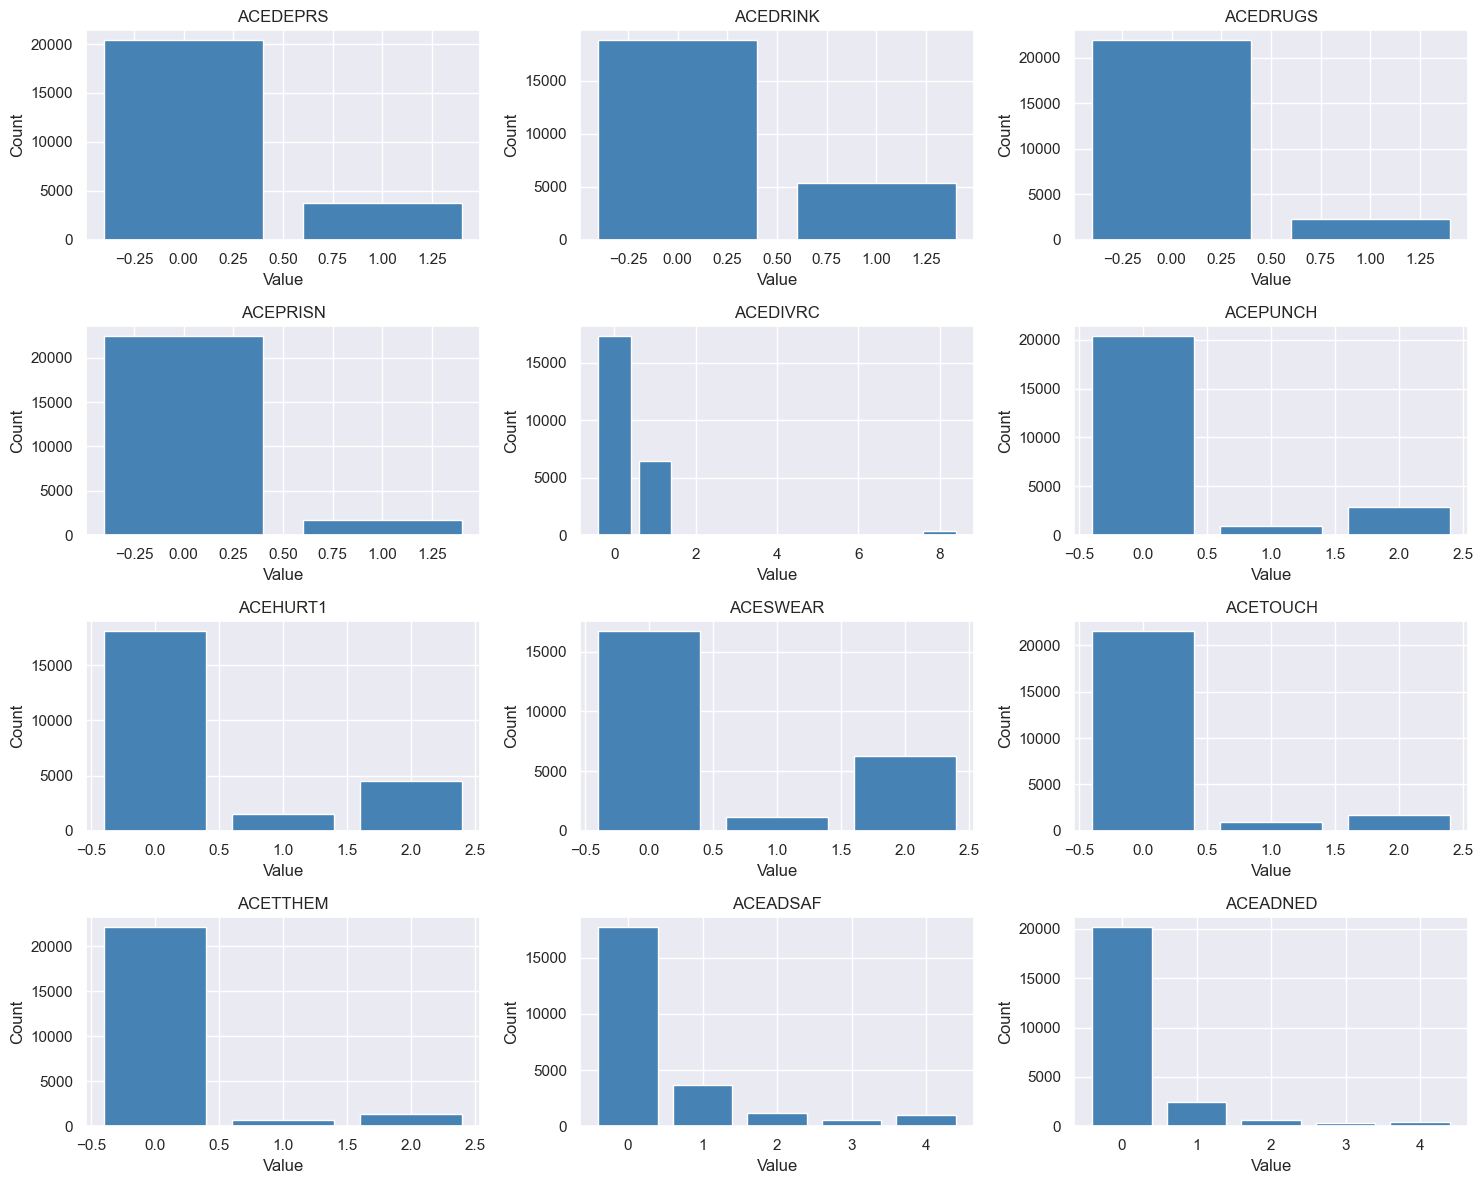

In [7]:
# Plot ACE variable distributions
fig, axes = plt.subplots(4, 3, figsize=(15, 12))
axes = axes.flatten()

for i, col in enumerate(ace_cols):
    counts = X_train[col].value_counts().sort_index()
    axes[i].bar(counts.index, counts.values, color='steelblue')
    axes[i].set_title(f'{col}')
    axes[i].set_ylabel('Count')
    axes[i].set_xlabel('Value')

plt.tight_layout()
plt.show()

#### ACE Score Distribution

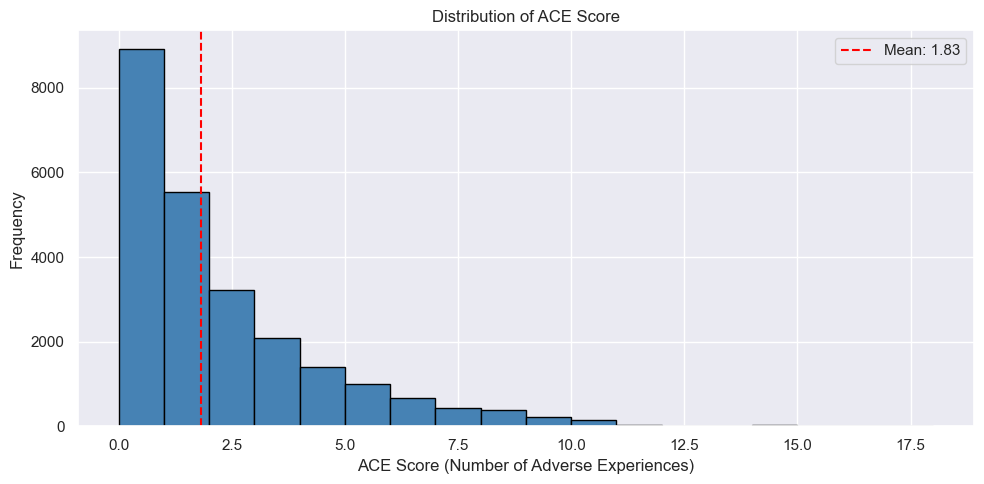

In [8]:
plt.figure(figsize=(10, 5))
plt.hist(X_train['ACE_SCORE'], bins=range(0, int(X_train['ACE_SCORE'].max()) + 2), 
         color='steelblue', edgecolor='black')
plt.title('Distribution of ACE Score')
plt.xlabel('ACE Score (Number of Adverse Experiences)')
plt.ylabel('Frequency')
plt.axvline(X_train['ACE_SCORE'].mean(), color='red', linestyle='--', 
            label=f'Mean: {X_train["ACE_SCORE"].mean():.2f}')
plt.legend()
plt.tight_layout()
plt.show()

In [9]:
print("ACE Score Statistics:")
print(X_train['ACE_SCORE'].describe())

ACE Score Statistics:
count    24158.000000
mean         1.827097
std          2.306347
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         17.000000
Name: ACE_SCORE, dtype: float64


#### At Least 1 ACE Feature

At Least 1 ACE Distribution:
at_least_1_ace
1    16278
0     7880
Name: count, dtype: int64

With at least 1 ACE: 67.4%
With 0 ACEs: 32.6%


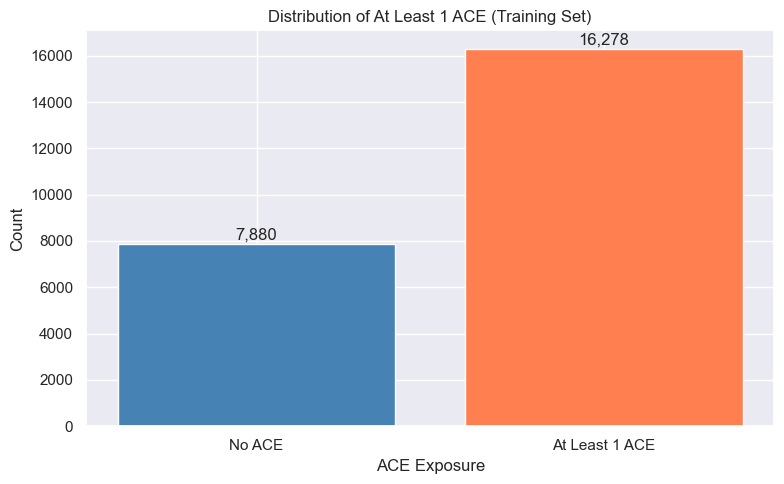

In [10]:
print("At Least 1 ACE Distribution:")
print(X_train['at_least_1_ace'].value_counts())
print(f"\nWith at least 1 ACE: {X_train['at_least_1_ace'].mean():.1%}")
print(f"With 0 ACEs: {(1 - X_train['at_least_1_ace'].mean()):.1%}")

plt.figure(figsize=(8, 5))
counts = X_train['at_least_1_ace'].value_counts().sort_index()
plt.bar(['No ACE', 'At Least 1 ACE'], counts.values, color=['steelblue', 'coral'])
plt.title('Distribution of At Least 1 ACE (Training Set)')
plt.ylabel('Count')
plt.xlabel('ACE Exposure')
for i, v in enumerate(counts.values):
    plt.text(i, v + 200, f'{v:,}', ha='center')
plt.tight_layout()
plt.show()

#### Demographic and Health Variables

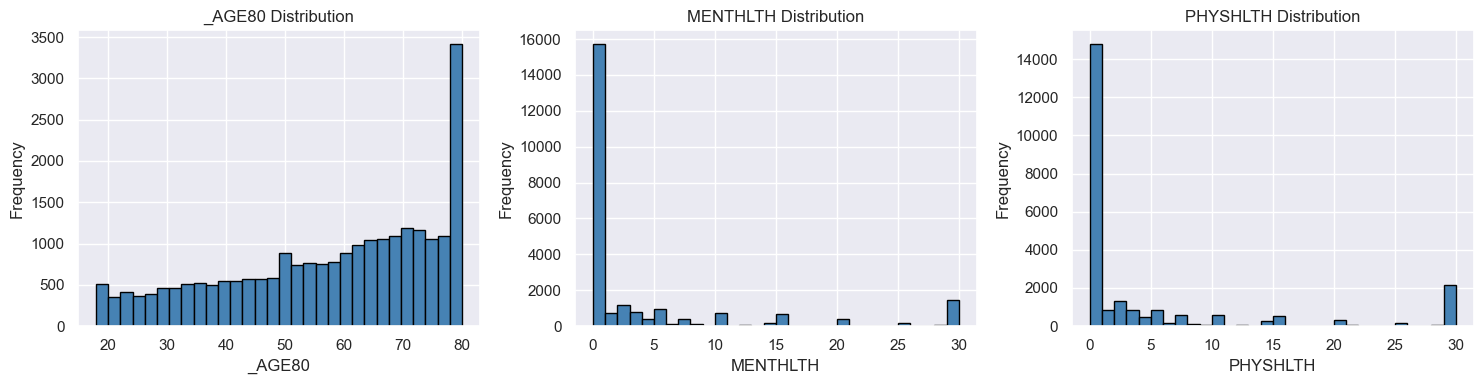

In [11]:
# Continuous variables
continuous_vars = ['_AGE80', 'MENTHLTH', 'PHYSHLTH']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, var in enumerate(continuous_vars):
    axes[i].hist(X_train[var], bins=30, color='steelblue', edgecolor='black')
    axes[i].set_title(f'{var} Distribution')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

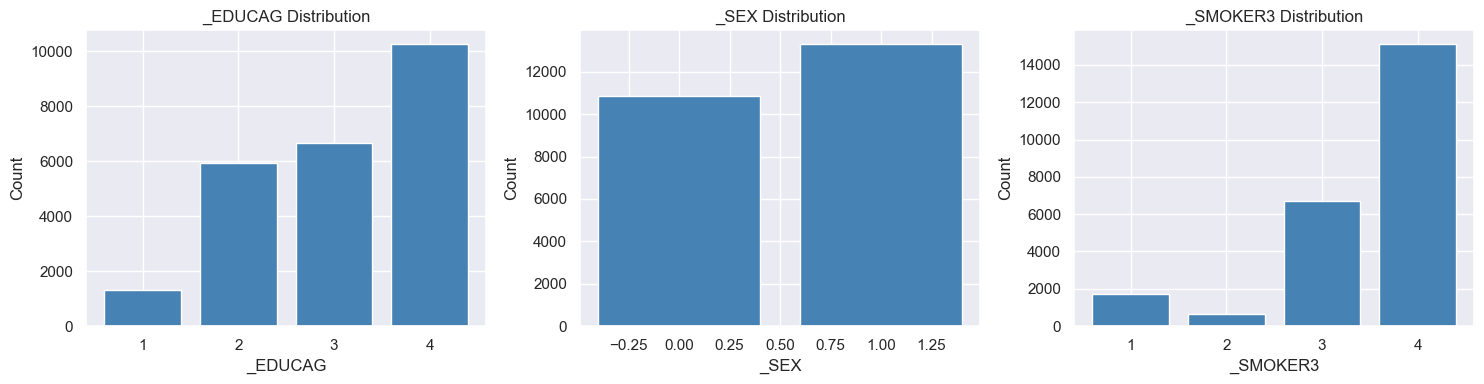

In [12]:
# Categorical variables
categorical_vars = ['_EDUCAG', '_SEX', '_SMOKER3']

fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, var in enumerate(categorical_vars):
    counts = X_train[var].value_counts().sort_index()
    axes[i].bar(counts.index, counts.values, color='steelblue')
    axes[i].set_title(f'{var} Distribution')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

---
### Distribution by Risky Drinking Status

#### ACE Score by Risky Drinking

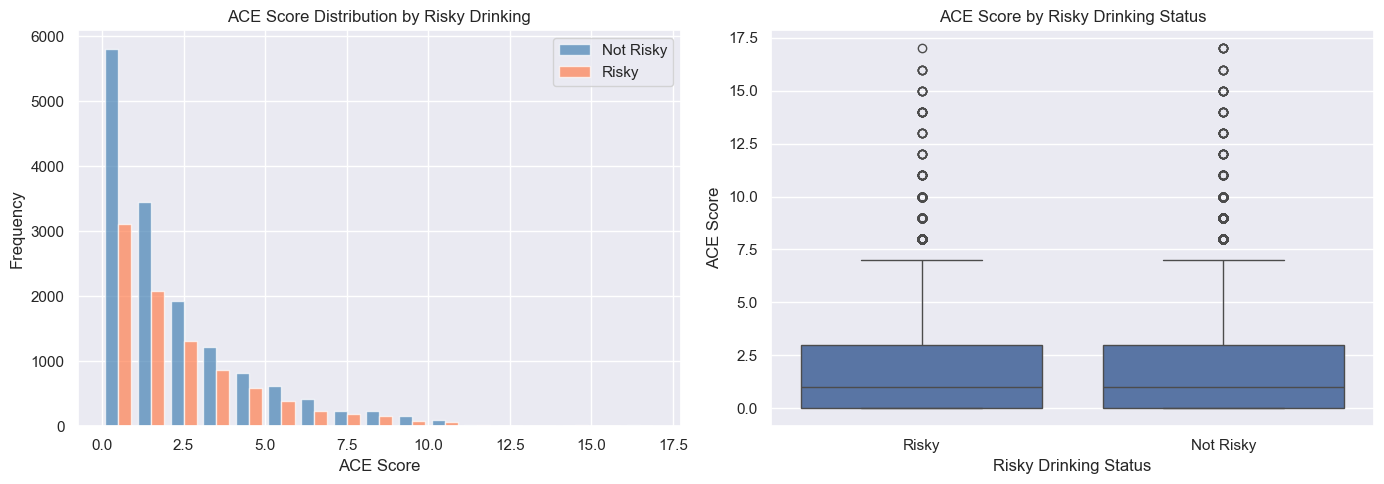

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram comparison
risky = X_train[y_train['risky_drinking'] == True]['ACE_SCORE']
not_risky = X_train[y_train['risky_drinking'] == False]['ACE_SCORE']

axes[0].hist([not_risky, risky], bins=range(0, 18), label=['Not Risky', 'Risky'], 
             color=['steelblue', 'coral'], alpha=0.7)
axes[0].set_title('ACE Score Distribution by Risky Drinking')
axes[0].set_xlabel('ACE Score')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Box plot
data_for_box = pd.DataFrame({
    'ACE_SCORE': X_train['ACE_SCORE'],
    'risky_drinking': y_train['risky_drinking'].values.ravel()
})
data_for_box['risky_drinking'] = data_for_box['risky_drinking'].map({False: 'Not Risky', True: 'Risky'})
sns.boxplot(data=data_for_box, x='risky_drinking', y='ACE_SCORE', ax=axes[1])
axes[1].set_title('ACE Score by Risky Drinking Status')
axes[1].set_xlabel('Risky Drinking Status')
axes[1].set_ylabel('ACE Score')

plt.tight_layout()
plt.show()

In [14]:
print("ACE Score Statistics by Risky Drinking:")
print("Not Risky:")
print(not_risky.describe())
print("Risky:")
print(risky.describe())

ACE Score Statistics by Risky Drinking:
Not Risky:
count    15048.000000
mean         1.771066
std          2.298174
min          0.000000
25%          0.000000
50%          1.000000
75%          3.000000
max         17.000000
Name: ACE_SCORE, dtype: float64
Risky:
count    9110.000000
mean        1.919649
std         2.316944
min         0.000000
25%         0.000000
50%         1.000000
75%         3.000000
max        17.000000
Name: ACE_SCORE, dtype: float64


#### Individual ACE Variables by Risky Drinking

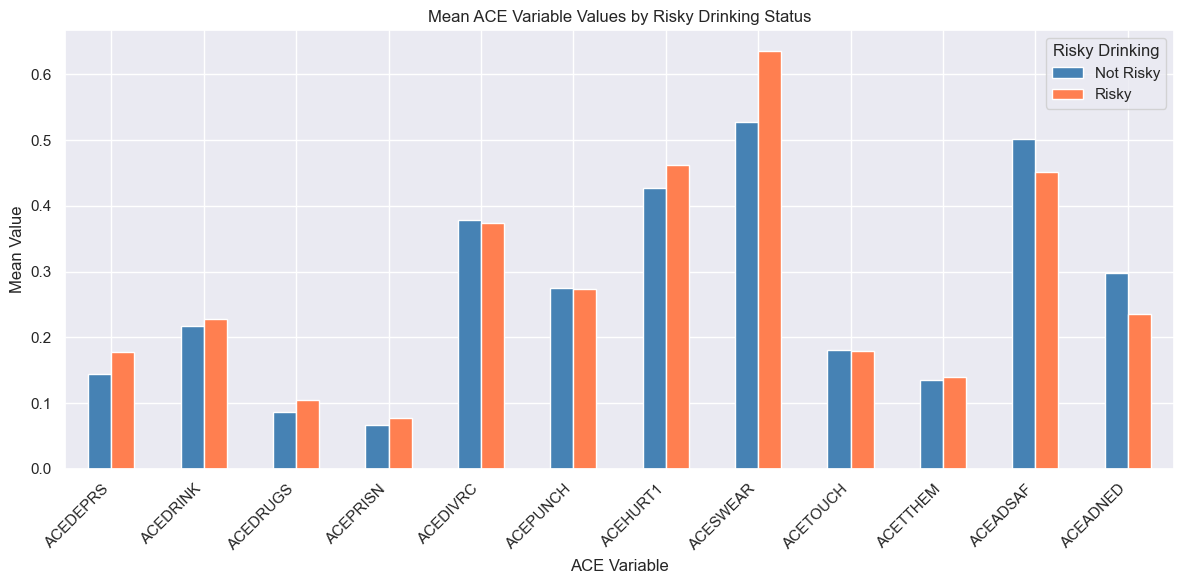

In [15]:
# Mean of each ACE variable by risky drinking status
ace_means = pd.DataFrame({
    'Not Risky': X_train[y_train['risky_drinking'] == 0][ace_cols].mean(),
    'Risky': X_train[y_train['risky_drinking'] == 1][ace_cols].mean()
})

ace_means.plot(kind='bar', figsize=(12, 6), color=['steelblue', 'coral'])
plt.title('Mean ACE Variable Values by Risky Drinking Status')
plt.xlabel('ACE Variable')
plt.ylabel('Mean Value')
plt.xticks(rotation=45, ha='right')
plt.legend(title='Risky Drinking')
plt.tight_layout()
plt.show()

#### At least 1 ACE by risky drinking

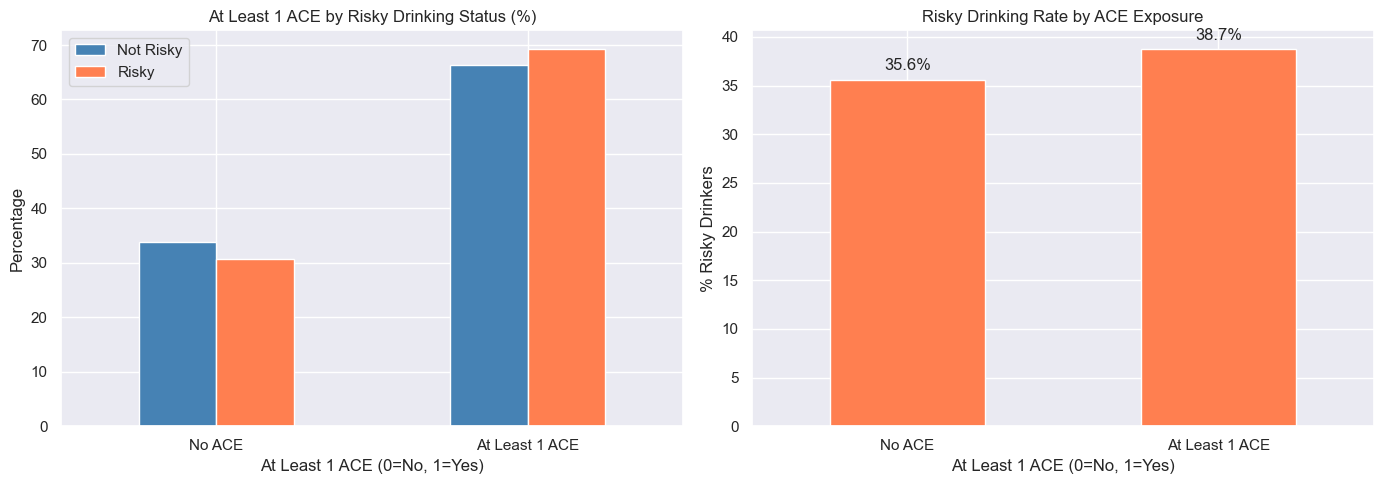

Risky Drinking Rate by ACE Exposure:
No ACE: 35.6%
At Least 1 ACE: 38.7%
Difference: 3.2 percentage points


In [16]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
ace_by_risky = pd.crosstab(X_train['at_least_1_ace'], y_train['risky_drinking'], normalize='columns') * 100
ace_by_risky.plot(kind='bar', ax=axes[0], color=['steelblue', 'coral'])
axes[0].set_title('At Least 1 ACE by Risky Drinking Status (%)')
axes[0].set_xlabel('At Least 1 ACE (0=No, 1=Yes)')
axes[0].set_ylabel('Percentage')
axes[0].set_xticklabels(['No ACE', 'At Least 1 ACE'], rotation=0)
axes[0].legend(['Not Risky', 'Risky'])

# Risky drinking rate by ACE exposure
risky_by_ace = pd.crosstab(X_train['at_least_1_ace'], y_train['risky_drinking'], normalize='index') * 100
risky_by_ace[True].plot(kind='bar', ax=axes[1], color='coral')
axes[1].set_title('Risky Drinking Rate by ACE Exposure')
axes[1].set_xlabel('At Least 1 ACE (0=No, 1=Yes)')
axes[1].set_ylabel('% Risky Drinkers')
axes[1].set_xticklabels(['No ACE', 'At Least 1 ACE'], rotation=0)
for i, v in enumerate(risky_by_ace[True].values):
    axes[1].text(i, v + 1, f'{v:.1f}%', ha='center')

plt.tight_layout()
plt.show()

print("Risky Drinking Rate by ACE Exposure:")
print(f"No ACE: {risky_by_ace.loc[0, True]:.1f}%")
print(f"At Least 1 ACE: {risky_by_ace.loc[1, True]:.1f}%")
print(f"Difference: {risky_by_ace.loc[1, True] - risky_by_ace.loc[0, True]:.1f} percentage points")

#### Continuous Variables by Risky Drinking

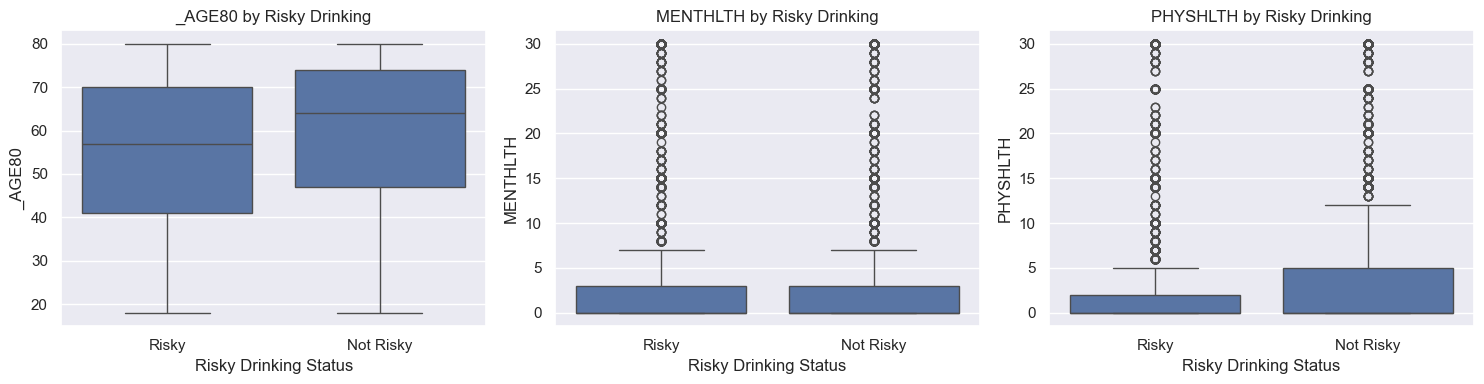

In [17]:
fig, axes = plt.subplots(1, 3, figsize=(15, 4))

for i, var in enumerate(continuous_vars):
    data_for_box = pd.DataFrame({
        var: X_train[var],
        'risky_drinking': y_train['risky_drinking'].values.ravel()
    })
    data_for_box['risky_drinking'] = data_for_box['risky_drinking'].map({False: 'Not Risky', True: 'Risky'})
    sns.boxplot(data=data_for_box, x='risky_drinking', y=var, ax=axes[i])
    axes[i].set_title(f'{var} by Risky Drinking')
    axes[i].set_xlabel('Risky Drinking Status')

plt.tight_layout()
plt.show()

---
### Correlation Analysis

#### Correlation with target variable

In [18]:
# Combine features and target for correlation
data_with_target = X_train.copy()
data_with_target['risky_drinking'] = y_train['risky_drinking'].values

# Calculate correlation with target
correlations = data_with_target.corr()['risky_drinking'].drop('risky_drinking').sort_values(ascending=False)

print("Top 10 Positive Correlations with Risky Drinking:")
print(correlations.head(10))
print("\nTop 10 Negative Correlations with Risky Drinking:")
print(correlations.tail(10))

Top 10 Positive Correlations with Risky Drinking:
_EDUCAG           0.150079
ACESWEAR          0.059930
ACEDEPRS          0.043952
ACEDRUGS          0.031541
ACE_SCORE         0.031224
at_least_1_ace    0.030525
ACEHURT1          0.021551
ACEPRISN          0.019821
ACEDRINK          0.012123
ACETTHEM          0.003776
Name: risky_drinking, dtype: float64

Top 10 Negative Correlations with Risky Drinking:
race_4.0   -0.009669
ACEADSAF   -0.024309
race_2.0   -0.038546
ACEADNED   -0.041050
race_3.0   -0.041878
_SMOKER3   -0.046055
race_5.0   -0.084210
PHYSHLTH   -0.110312
_SEX       -0.120449
_AGE80     -0.123579
Name: risky_drinking, dtype: float64


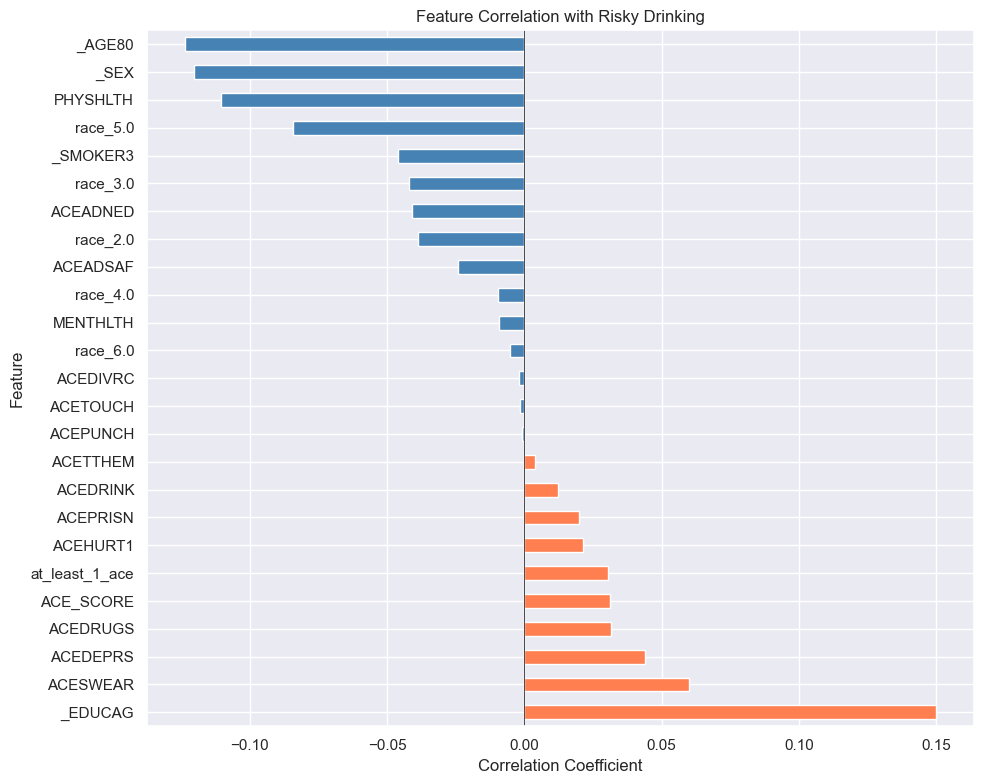

In [19]:
# Plot correlations
plt.figure(figsize=(10, 8))
correlations.plot(kind='barh', color=['coral' if x > 0 else 'steelblue' for x in correlations])
plt.title('Feature Correlation with Risky Drinking')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature')
plt.axvline(x=0, color='black', linestyle='-', linewidth=0.5)
plt.tight_layout()
plt.show()

#### ACE Variables Correlation Matrix

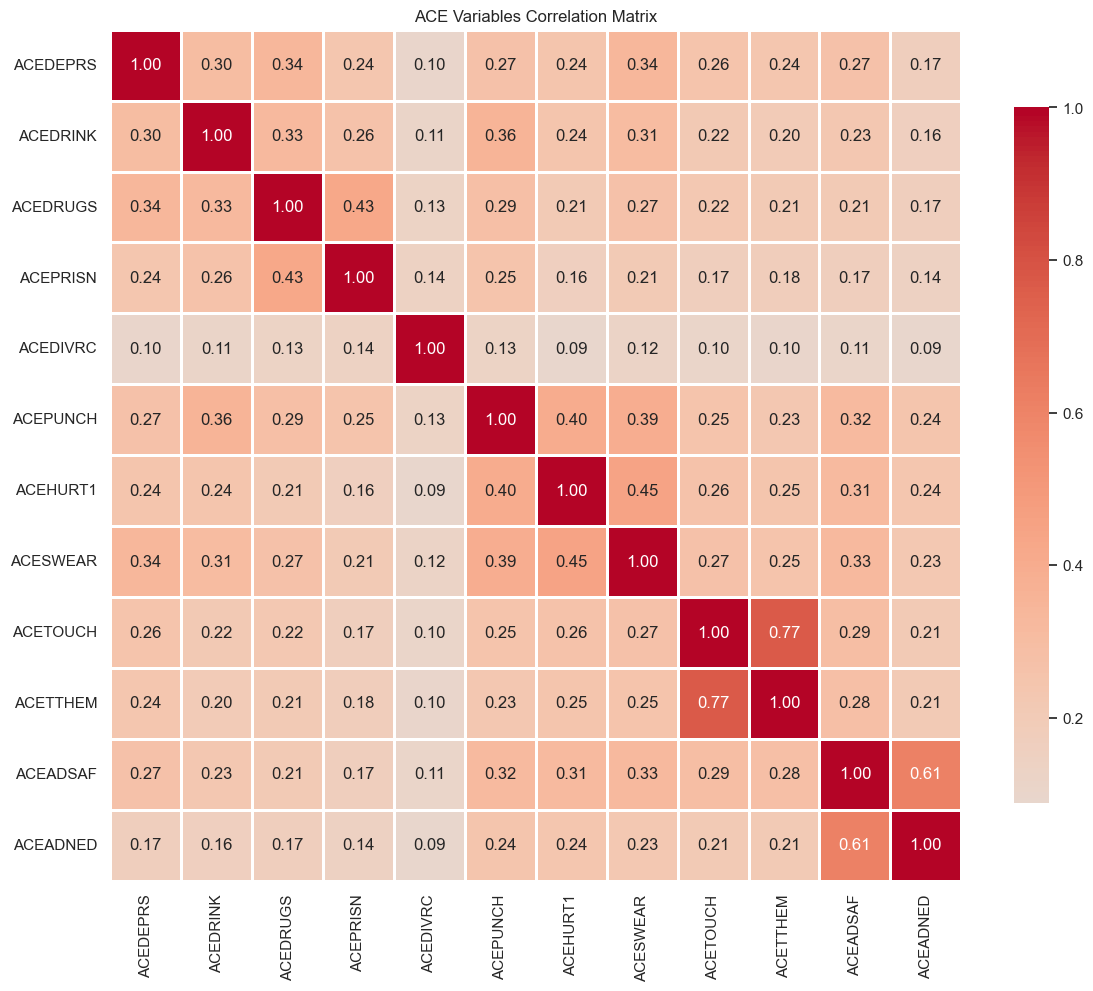

In [20]:
# Correlation matrix for ACE variables
ace_corr = X_train[ace_cols].corr()

plt.figure(figsize=(12, 10))
sns.heatmap(ace_corr, annot=True, fmt='.2f', cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('ACE Variables Correlation Matrix')
plt.tight_layout()
plt.show()

---
### Feature Importance

#### Correlation-based Importance

In [21]:
# Absolute correlation values
abs_correlations = correlations.abs().sort_values(ascending=False)

print("Top 15 Most Important Features:")
for i, (feature, corr) in enumerate(abs_correlations.head(15).items(), 1):
    print(f"{i:2d}. {feature:15s}: {corr:.4f}")

Top 15 Most Important Features:
 1. _EDUCAG        : 0.1501
 2. _AGE80         : 0.1236
 3. _SEX           : 0.1204
 4. PHYSHLTH       : 0.1103
 5. race_5.0       : 0.0842
 6. ACESWEAR       : 0.0599
 7. _SMOKER3       : 0.0461
 8. ACEDEPRS       : 0.0440
 9. race_3.0       : 0.0419
10. ACEADNED       : 0.0410
11. race_2.0       : 0.0385
12. ACEDRUGS       : 0.0315
13. ACE_SCORE      : 0.0312
14. at_least_1_ace : 0.0305
15. ACEADSAF       : 0.0243


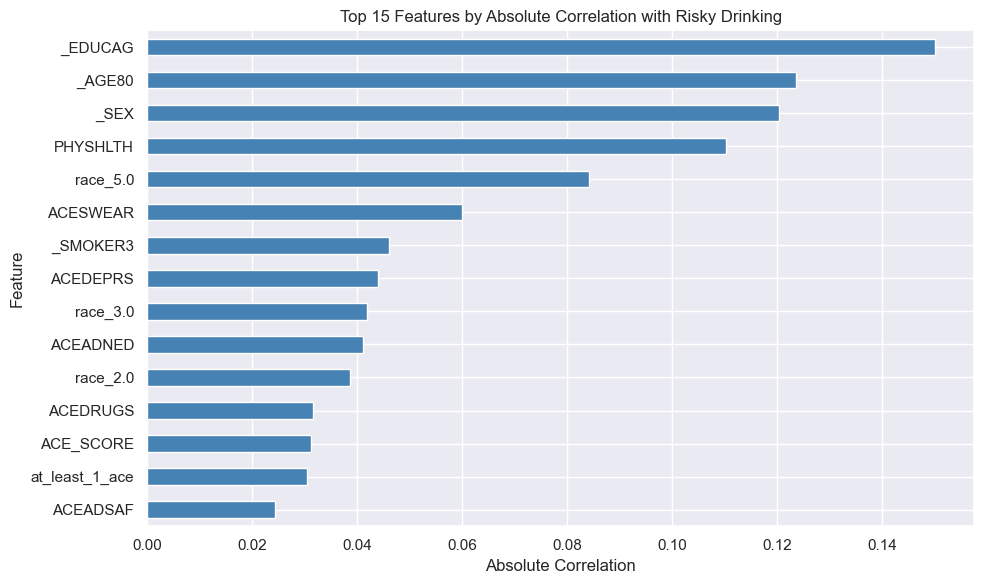

In [22]:
# Plot top 15
plt.figure(figsize=(10, 6))
abs_correlations.head(15).plot(kind='barh', color='steelblue')
plt.title('Top 15 Features by Absolute Correlation with Risky Drinking')
plt.xlabel('Absolute Correlation')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### Random Forest Feature Importance

In [23]:
# Train Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42, max_depth=10)
rf.fit(X_train, y_train['risky_drinking'].values.ravel())

# Get feature importances
feature_importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)

print("Top 15 Most Important Features:")
for i, (feature, importance) in enumerate(feature_importances.head(15).items(), 1):
    print(f"{i:2d}. {feature:15s}: {importance:.4f}")

Top 15 Most Important Features:
 1. _AGE80         : 0.1966
 2. _EDUCAG        : 0.1294
 3. PHYSHLTH       : 0.1071
 4. _SEX           : 0.0793
 5. MENTHLTH       : 0.0630
 6. ACE_SCORE      : 0.0517
 7. _SMOKER3       : 0.0506
 8. race_5.0       : 0.0428
 9. ACEADSAF       : 0.0322
10. ACEADNED       : 0.0300
11. ACESWEAR       : 0.0237
12. race_3.0       : 0.0206
13. race_2.0       : 0.0205
14. ACEHURT1       : 0.0191
15. ACEPUNCH       : 0.0186


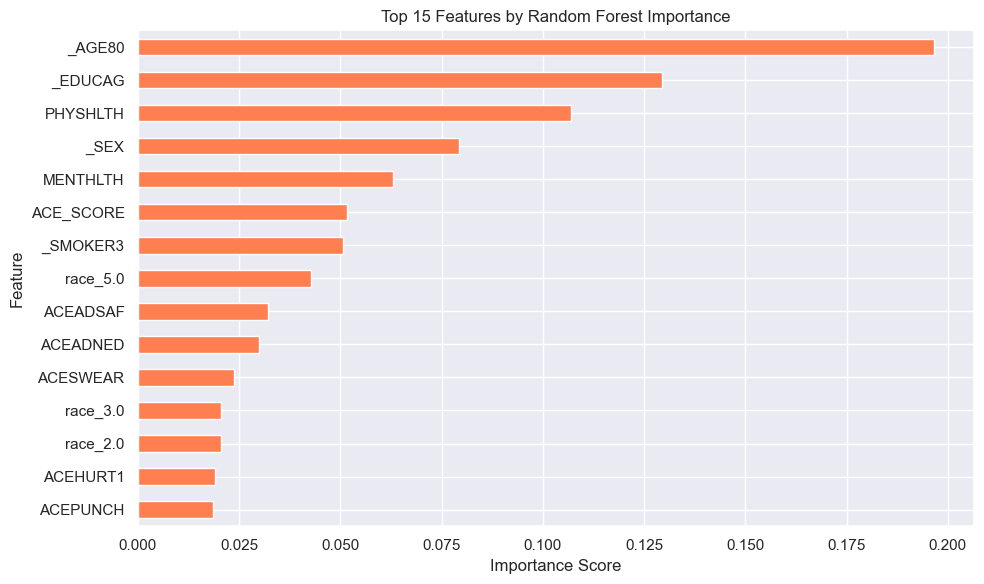

In [24]:
# Plot top 15
plt.figure(figsize=(10, 6))
feature_importances.head(15).plot(kind='barh', color='coral')
plt.title('Top 15 Features by Random Forest Importance')
plt.xlabel('Importance Score')
plt.ylabel('Feature')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

#### ACE variables importance

In [25]:
# ACE variables
ace_correlations = correlations[ace_cols].abs().sort_values(ascending=False)
ace_rf_importance = feature_importances[ace_cols].sort_values(ascending=False)

print("ACE Variables Ranked by Correlation:")
for i, (feature, corr) in enumerate(ace_correlations.items(), 1):
    print(f"{i:2d}. {feature:15s}: {corr:.4f}")

print("\nACE Variables Ranked by Random Forest Importance:")
for i, (feature, importance) in enumerate(ace_rf_importance.items(), 1):
    print(f"{i:2d}. {feature:15s}: {importance:.4f}")

ACE Variables Ranked by Correlation:
 1. ACESWEAR       : 0.0599
 2. ACEDEPRS       : 0.0440
 3. ACEADNED       : 0.0410
 4. ACEDRUGS       : 0.0315
 5. ACEADSAF       : 0.0243
 6. ACEHURT1       : 0.0216
 7. ACEPRISN       : 0.0198
 8. ACEDRINK       : 0.0121
 9. ACETTHEM       : 0.0038
10. ACEDIVRC       : 0.0020
11. ACETOUCH       : 0.0016
12. ACEPUNCH       : 0.0010

ACE Variables Ranked by Random Forest Importance:
 1. ACEADSAF       : 0.0322
 2. ACEADNED       : 0.0300
 3. ACESWEAR       : 0.0237
 4. ACEHURT1       : 0.0191
 5. ACEPUNCH       : 0.0186
 6. ACEDIVRC       : 0.0169
 7. ACETOUCH       : 0.0164
 8. ACETTHEM       : 0.0138
 9. ACEDEPRS       : 0.0138
10. ACEDRINK       : 0.0132
11. ACEPRISN       : 0.0108
12. ACEDRUGS       : 0.0107


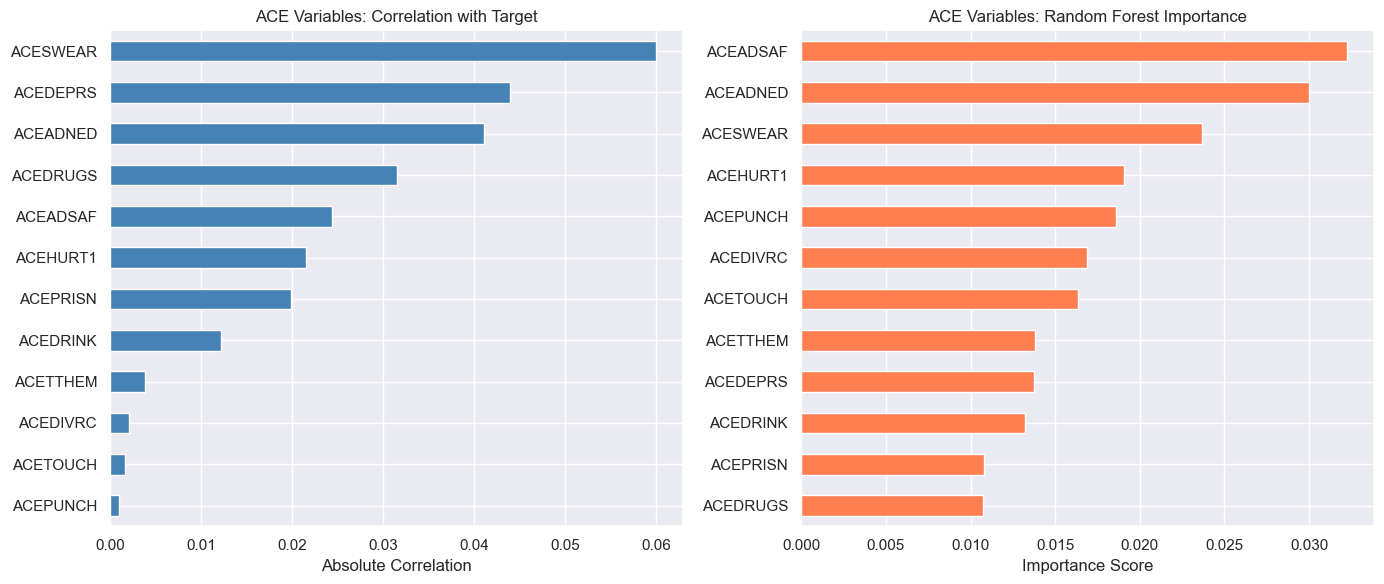

In [26]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

ace_correlations.plot(kind='barh', ax=axes[0], color='steelblue')
axes[0].set_title('ACE Variables: Correlation with Target')
axes[0].set_xlabel('Absolute Correlation')
axes[0].invert_yaxis()

ace_rf_importance.plot(kind='barh', ax=axes[1], color='coral')
axes[1].set_title('ACE Variables: Random Forest Importance')
axes[1].set_xlabel('Importance Score')
axes[1].invert_yaxis()

plt.tight_layout()
plt.show()

In [27]:
# Summary comparison table
summary = pd.DataFrame({
    'Correlation_Rank': range(1, len(abs_correlations) + 1),
    'Correlation_Score': abs_correlations.values,
    'RF_Importance': [feature_importances[f] for f in abs_correlations.index]
}, index=abs_correlations.index)

summary['RF_Rank'] = summary['RF_Importance'].rank(ascending=False).astype(int)
summary = summary.sort_values('Correlation_Rank')

print("Feature Importance Summary (Top 15):")
print(summary.head(15))

Feature Importance Summary (Top 15):
                Correlation_Rank  Correlation_Score  RF_Importance  RF_Rank
_EDUCAG                        1           0.150079       0.129418        2
_AGE80                         2           0.123579       0.196608        1
_SEX                           3           0.120449       0.079310        4
PHYSHLTH                       4           0.110312       0.107067        3
race_5.0                       5           0.084210       0.042803        8
ACESWEAR                       6           0.059930       0.023658       11
_SMOKER3                       7           0.046055       0.050574        7
ACEDEPRS                       8           0.043952       0.013758       19
race_3.0                       9           0.041878       0.020559       12
ACEADNED                      10           0.041050       0.030005       10
race_2.0                      11           0.038546       0.020527       13
ACEDRUGS                      12           0.031541

In [28]:
# ACE summary
ace_summary = summary.loc[ace_cols].copy()
ace_summary = ace_summary.sort_values('Correlation_Score', ascending=False)

print("ACE Variables Importance Summary:")
print(ace_summary)

ACE Variables Importance Summary:
          Correlation_Rank  Correlation_Score  RF_Importance  RF_Rank
ACESWEAR                 6           0.059930       0.023658       11
ACEDEPRS                 8           0.043952       0.013758       19
ACEADNED                10           0.041050       0.030005       10
ACEDRUGS                12           0.031541       0.010710       22
ACEADSAF                15           0.024309       0.032222        9
ACEHURT1                16           0.021551       0.019079       14
ACEPRISN                17           0.019821       0.010769       21
ACEDRINK                18           0.012123       0.013195       20
ACETTHEM                22           0.003776       0.013834       18
ACEDIVRC                23           0.002011       0.016850       16
ACETOUCH                24           0.001633       0.016354       17
ACEPUNCH                25           0.000976       0.018563       15
